In [1]:
import random
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
def Cipher_characterset():
    return 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
def Cipher_get_dict():
    x=Cipher_characterset()
    y=range(len(x))
    return dict(zip(x,y)),dict(zip(y,x))

def ROT13(plaintext):
    C2I,I2C=Cipher_get_dict()
    #INPUTS
    plaintext=plaintext.upper()
    key=13
    ciphertext=[]
    for word in plaintext.split(' '):
        ciphertext.append(''.join([I2C[(C2I[i]+key)%26] for i in word]))
    ciphertext=' '.join(ciphertext)
    #OUTPUTS
    #print('\n\n\t\tPlaintext:  ',plaintext)
    #print('\n\n\t\tCiphertext: ',ciphertext)
    return ciphertext

In [4]:
if __name__=="__main__":
    print(ROT13(ROT13("Nishnaat")))

NISHNAAT


### ROT13 Cipher Known-Plaintext Attack

#### Password and Dataset Size

In [5]:
PASSWORD_SIZE=8
DATASET_SIZE=50

In [6]:
CHOICES=Cipher_characterset()
CHOICES

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [7]:
x=[]
y=[]
for i in range(DATASET_SIZE):
  temp=''
  for j in range(PASSWORD_SIZE):
    temp+=random.choice(CHOICES)
  x.append(temp)
  y.append(ROT13(temp))
print(x)
print(y)

['ATCEANFE', 'MUMDCJZC', 'YOTYXHSI', 'CYJBPDPO', 'TFUCDEVU', 'CTVNUNBH', 'IDYHOTWM', 'HXZFONHD', 'IWVGNQQU', 'LYFFYAIW', 'XMBWVQLU', 'YGAQNROX', 'KYQPZFXT', 'SODONHAL', 'MLIJOSSE', 'DSIJQEBT', 'PUWSOTRD', 'LUIQPNKA', 'JRDIMMEA', 'YBRFLNMH', 'LWNWSUQH', 'ZOGRSWZT', 'FHCBMYVZ', 'HKYUJVZR', 'SRZJQNOQ', 'KJSSHTQB', 'FFWVLMVS', 'BWECEQMI', 'TQSQVKWZ', 'ZPFUQIXQ', 'UNDEPPFK', 'TJWXFGZT', 'OETROIWQ', 'WFBOJIQQ', 'PDFWBWSJ', 'HRJUUEQA', 'CHKBQGEV', 'XUGIEFCS', 'HIKLKWLZ', 'TJMCAJLS', 'INZEGPPT', 'TAZBXARR', 'KKEISNLX', 'BHAFQQFE', 'YTCYPBKO', 'SYLFATLW', 'TGWZYJBS', 'HUUBXKVD', 'GYTNOQVP', 'NOASLOWU']
['NGPRNASR', 'ZHZQPWMP', 'LBGLKUFV', 'PLWOCQCB', 'GSHPQRIH', 'PGIAHAOU', 'VQLUBGJZ', 'UKMSBAUQ', 'VJITADDH', 'YLSSLNVJ', 'KZOJIDYH', 'LTNDAEBK', 'XLDCMSKG', 'FBQBAUNY', 'ZYVWBFFR', 'QFVWDROG', 'CHJFBGEQ', 'YHVDCAXN', 'WEQVZZRN', 'LOESYAZU', 'YJAJFHDU', 'MBTEFJMG', 'SUPOZLIM', 'UXLHWIME', 'FEMWDABD', 'XWFFUGDO', 'SSJIYZIF', 'OJRPRDZV', 'GDFDIXJM', 'MCSHDVKD', 'HAQRCCSX', 'GWJKSTMG', 'BRGEBVJD', 'J

In [8]:
Data=pd.DataFrame({'Plaintext':x,'Ciphertext':y})
Data.head(15)

,Plaintext,Ciphertext
0,ATCEANFE,NGPRNASR
1,MUMDCJZC,ZHZQPWMP
2,YOTYXHSI,LBGLKUFV
3,CYJBPDPO,PLWOCQCB
4,TFUCDEVU,GSHPQRIH
5,CTVNUNBH,PGIAHAOU
6,IDYHOTWM,VQLUBGJZ
7,HXZFONHD,UKMSBAUQ
8,IWVGNQQU,VJITADDH
9,LYFFYAIW,YLSSLNVJ


#### Since ROT13 is a Stream Cipher

In [9]:
plaintext=[]
ciphertext=[]
for password in x:
  for character in password:
    plaintext.append(character)
for Encrypted_password in y:
  for character in Encrypted_password:
    ciphertext.append(character)
Data=pd.DataFrame({'Plaintext':plaintext,'Ciphertext':ciphertext})
Data.head(15)

,Plaintext,Ciphertext
0,A,N
1,T,G
2,C,P
3,E,R
4,A,N
5,N,A
6,F,S
7,E,R
8,M,Z
9,U,H


#### Data Preprocessing

In [10]:
#encoding
plaintext=LabelEncoder().fit_transform(plaintext).reshape(-1, 1)
ciphertext=LabelEncoder().fit_transform(ciphertext).reshape(-1, 1)
X=OneHotEncoder().fit_transform(plaintext).toarray()
Y=OneHotEncoder().fit_transform(ciphertext).toarray()
print(X)
print(Y)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Splitting the Dataset - Decryption

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Y,X,test_size=0.2,random_state=0)
print(X_train.shape)

(320, 26)


In [12]:
model_ROT13= models.Sequential()
model_ROT13.add(layers.Dense(26, activation='relu',input_shape=(26,)))
model_ROT13.add(layers.Dense(39, activation='relu'))
model_ROT13.add(layers.Dense(26, activation='softmax'))
model_ROT13.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 39)                1053      
                                                                 
 dense_2 (Dense)             (None, 26)                1040      
                                                                 
Total params: 2,795
Trainable params: 2,795
Non-trainable params: 0
_________________________________________________________________


In [13]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)
model_ROT13.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

In [14]:
model_ROT13.fit(x=X_train,y=Y_train,epochs=1000,batch_size=10,validation_split=0.1,callbacks=EarlyStopping)

Epoch 1/1000
29/29 [==============================] - 1s 7ms/step - loss: 3.2538 - accuracy: 0.0694 - val_loss: 3.2632 - val_accuracy: 0.1250
Epoch 2/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.2433 - accuracy: 0.1285 - val_loss: 3.2540 - val_accuracy: 0.1250
Epoch 3/1000
29/29 [==============================] - 0s 3ms/step - loss: 3.2339 - accuracy: 0.1285 - val_loss: 3.2453 - val_accuracy: 0.1250
Epoch 4/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.2243 - accuracy: 0.1667 - val_loss: 3.2365 - val_accuracy: 0.1250
Epoch 5/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.2148 - accuracy: 0.1736 - val_loss: 3.2280 - val_accuracy: 0.1250
Epoch 6/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.2055 - accuracy: 0.2118 - val_loss: 3.2197 - val_accuracy: 0.1562
Epoch 7/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.1965 - accuracy: 0.2153 - val_loss: 3.2117 - val_accuracy: 0.1875
Epoch 

29/29 [==============================] - 0s 2ms/step - loss: 2.4664 - accuracy: 0.9896 - val_loss: 2.5241 - val_accuracy: 0.9375
Epoch 59/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.4455 - accuracy: 0.9826 - val_loss: 2.5042 - val_accuracy: 0.9375
Epoch 60/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.4241 - accuracy: 0.9896 - val_loss: 2.4831 - val_accuracy: 0.9375
Epoch 61/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.4022 - accuracy: 0.9896 - val_loss: 2.4618 - val_accuracy: 0.9375
Epoch 62/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.3801 - accuracy: 0.9896 - val_loss: 2.4405 - val_accuracy: 0.9375
Epoch 63/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.3579 - accuracy: 0.9896 - val_loss: 2.4196 - val_accuracy: 0.9375
Epoch 64/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.3353 - accuracy: 0.9896 - val_loss: 2.3973 - val_accuracy: 0.9375
Epoch 65/1000

29/29 [==============================] - 0s 2ms/step - loss: 1.0388 - accuracy: 0.9896 - val_loss: 1.1418 - val_accuracy: 0.9375
Epoch 116/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.0152 - accuracy: 0.9896 - val_loss: 1.1196 - val_accuracy: 0.9375
Epoch 117/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.9916 - accuracy: 0.9896 - val_loss: 1.0969 - val_accuracy: 0.9375
Epoch 118/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.9681 - accuracy: 0.9896 - val_loss: 1.0741 - val_accuracy: 0.9375
Epoch 119/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.9446 - accuracy: 0.9896 - val_loss: 1.0519 - val_accuracy: 0.9375
Epoch 120/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.9212 - accuracy: 0.9896 - val_loss: 1.0292 - val_accuracy: 0.9375
Epoch 121/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.8980 - accuracy: 0.9896 - val_loss: 1.0069 - val_accuracy: 0.9375
Epoch 1

Epoch 172/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9896 - val_loss: 0.2783 - val_accuracy: 0.9375
Epoch 173/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9896 - val_loss: 0.2710 - val_accuracy: 0.9375
Epoch 174/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9896 - val_loss: 0.2638 - val_accuracy: 0.9375
Epoch 175/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9896 - val_loss: 0.2571 - val_accuracy: 0.9375
Epoch 176/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9896 - val_loss: 0.2505 - val_accuracy: 0.9375
Epoch 177/1000
29/29 [==============================] - 0s 4ms/step - loss: 0.1329 - accuracy: 0.9896 - val_loss: 0.2441 - val_accuracy: 0.9375
Epoch 178/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9896 - val_loss: 0.2377 - val_accuracy:

Epoch 229/1000
29/29 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 230/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 231/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 1.0000
Epoch 232/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 233/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 234/1000
29/29 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 235/1000
29/29 [==============================] - 0s 4ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy:

Epoch 286/1000
29/29 [==============================] - 0s 6ms/step - loss: 6.4447e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 287/1000
29/29 [==============================] - 0s 4ms/step - loss: 6.0814e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 288/1000
29/29 [==============================] - 0s 4ms/step - loss: 5.7168e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 289/1000
29/29 [==============================] - 0s 6ms/step - loss: 5.3969e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 290/1000
29/29 [==============================] - 0s 5ms/step - loss: 5.0900e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 291/1000
29/29 [==============================] - 0s 4ms/step - loss: 4.7914e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 292/1000
29/29 [==============================] - 0s 4ms/step - loss: 4.5062e-04 - accuracy: 1.0000 - val_

29/29 [==============================] - 0s 2ms/step - loss: 2.2107e-05 - accuracy: 1.0000 - val_loss: 7.0733e-05 - val_accuracy: 1.0000
Epoch 341/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.0713e-05 - accuracy: 1.0000 - val_loss: 6.4934e-05 - val_accuracy: 1.0000
Epoch 342/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.9263e-05 - accuracy: 1.0000 - val_loss: 6.0105e-05 - val_accuracy: 1.0000
Epoch 343/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.7954e-05 - accuracy: 1.0000 - val_loss: 5.5593e-05 - val_accuracy: 1.0000
Epoch 344/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.6669e-05 - accuracy: 1.0000 - val_loss: 5.1889e-05 - val_accuracy: 1.0000
Epoch 345/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.5704e-05 - accuracy: 1.0000 - val_loss: 4.9033e-05 - val_accuracy: 1.0000
Epoch 346/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4697e-05 - accuracy: 1.00

Epoch 394/1000
29/29 [==============================] - 0s 2ms/step - loss: 6.9580e-07 - accuracy: 1.0000 - val_loss: 1.7807e-06 - val_accuracy: 1.0000
Epoch 395/1000
29/29 [==============================] - 0s 2ms/step - loss: 6.6351e-07 - accuracy: 1.0000 - val_loss: 1.6689e-06 - val_accuracy: 1.0000
Epoch 396/1000
29/29 [==============================] - 0s 2ms/step - loss: 6.0970e-07 - accuracy: 1.0000 - val_loss: 1.5385e-06 - val_accuracy: 1.0000
Epoch 397/1000
29/29 [==============================] - 0s 2ms/step - loss: 5.6873e-07 - accuracy: 1.0000 - val_loss: 1.4640e-06 - val_accuracy: 1.0000
Epoch 398/1000
29/29 [==============================] - 0s 2ms/step - loss: 5.5258e-07 - accuracy: 1.0000 - val_loss: 1.4044e-06 - val_accuracy: 1.0000
Epoch 399/1000
29/29 [==============================] - 0s 2ms/step - loss: 5.3189e-07 - accuracy: 1.0000 - val_loss: 1.3448e-06 - val_accuracy: 1.0000
Epoch 400/1000
29/29 [==============================] - 0s 2ms/step - loss: 5.1533e-07 -

Epoch 448/1000
29/29 [==============================] - 0s 2ms/step - loss: 8.3612e-08 - accuracy: 1.0000 - val_loss: 1.6391e-07 - val_accuracy: 1.0000
Epoch 449/1000
29/29 [==============================] - 0s 2ms/step - loss: 7.9473e-08 - accuracy: 1.0000 - val_loss: 1.6764e-07 - val_accuracy: 1.0000
Epoch 450/1000
29/29 [==============================] - 0s 2ms/step - loss: 7.7817e-08 - accuracy: 1.0000 - val_loss: 1.7136e-07 - val_accuracy: 1.0000
Epoch 451/1000
29/29 [==============================] - 0s 2ms/step - loss: 7.4920e-08 - accuracy: 1.0000 - val_loss: 1.6019e-07 - val_accuracy: 1.0000
Epoch 452/1000
29/29 [==============================] - 0s 2ms/step - loss: 7.3264e-08 - accuracy: 1.0000 - val_loss: 1.4901e-07 - val_accuracy: 1.0000
Epoch 453/1000
29/29 [==============================] - 0s 2ms/step - loss: 7.2436e-08 - accuracy: 1.0000 - val_loss: 1.3411e-07 - val_accuracy: 1.0000
Epoch 454/1000
29/29 [==============================] - 0s 2ms/step - loss: 6.8297e-08 -

Epoch 502/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.6905e-08 - accuracy: 1.0000 - val_loss: 5.5879e-08 - val_accuracy: 1.0000
Epoch 503/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.8974e-08 - accuracy: 1.0000 - val_loss: 5.9605e-08 - val_accuracy: 1.0000
Epoch 504/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.0216e-08 - accuracy: 1.0000 - val_loss: 5.5879e-08 - val_accuracy: 1.0000
Epoch 505/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.6077e-08 - accuracy: 1.0000 - val_loss: 5.2154e-08 - val_accuracy: 1.0000
Epoch 506/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.5663e-08 - accuracy: 1.0000 - val_loss: 5.2154e-08 - val_accuracy: 1.0000
Epoch 507/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.4835e-08 - accuracy: 1.0000 - val_loss: 6.3330e-08 - val_accuracy: 1.0000
Epoch 508/1000
29/29 [==============================] - 0s 2ms/step - loss: 2.7319e-08 -

In [15]:
History = model_ROT13.history

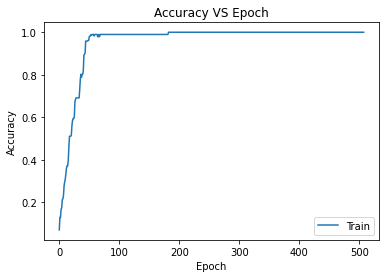

In [16]:
plt.plot(History.history['accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

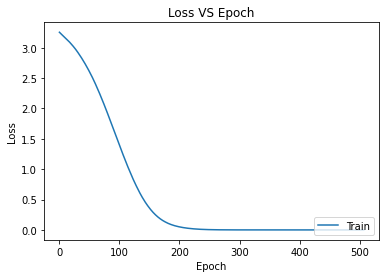

In [17]:
plt.plot(History.history['loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

In [18]:
Loss,Accuracy=model_ROT13.evaluate(X_test,Y_test,verbose=1)
print('Accuracy: ',Accuracy)
print('Loss: ',Loss)

3/3 [==============================] - 0s 1ms/step - loss: 5.8115e-08 - accuracy: 1.0000
Accuracy:  1.0
Loss:  5.8114515866236616e-08


In [19]:
Categories=[i for i in CHOICES]
Label_Encoding=LabelEncoder().fit_transform(Categories).reshape(-1,1)
One_Hot_Encoding=OneHotEncoder().fit_transform(Label_Encoding).toarray()
Categories_Dictionary={Categories[i]:One_Hot_Encoding[i] for i in range(len(Categories))}
Categories_Dictionary_Reverse={tuple(One_Hot_Encoding[i]):Categories[i] for i in range(len(Categories))}
print(Categories_Dictionary)
print(Categories_Dictionary_Reverse)

{'A': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'B': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'C': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'D': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'E': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'F': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'G': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'H': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]),

In [20]:
def Decode(character,Categories_Dictionary_Reverse=Categories_Dictionary_Reverse):
  #print(np.array(Categories_Dictionary[character]).shape)
  prediction=model_ROT13.predict(np.array(Categories_Dictionary[character]).reshape(1,26))
  prediction=prediction>=prediction.max()
  #print(prediction)
  temp=[0.0 for i in range(26)]
  for i in range(len(prediction[0])):
    if prediction[0][i]==True:
      temp[i]=1
  return Categories_Dictionary_Reverse[tuple(temp)]

In [21]:
character='N'
print(character)
print(Decode(character))

N
A


In [22]:
MESSAGE="Nishnaat Nagar"
MESSAGE=MESSAGE.upper()
print("\t\tOriginal Message:\t\t\t\t",MESSAGE)
ENCRYPTED_MESSAGE=ROT13(MESSAGE)
print("\n\n\t\tMessage after Encryption using ROT13 Cipher:\t",ENCRYPTED_MESSAGE)
#print("Key used for Encryption: ",KEY)
DECRYPTED_MESSAGE=''
for i in ENCRYPTED_MESSAGE:
  if i==' ':
    DECRYPTED_MESSAGE+=i
  else:
    DECRYPTED_MESSAGE+=Decode(i)
print("\n\n\t\tMessage after AI based Decryption:\t\t",DECRYPTED_MESSAGE)

		Original Message:				 NISHNAAT NAGAR


		Message after Encryption using ROT13 Cipher:	 AVFUANNG ANTNE


		Message after AI based Decryption:		 NISHNAAT NAGAR
